# Assignment: Trees
Do three questions.

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


## **Q1.** Please answer the following questions in your own words.


1. How are trees constructed?

Trees have a set of decision nodes that represent decision points, a set of edges that represent choices at each decision node, and a set of terminal nodes/outcomes at the bottom of the tree. They are constructed by splitting the data into groups and evaluating whether the split is "good" or not.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

Trees handle non-linear relationships between the target variables and data, which is an advantage, by creating random forests. These random forests reduce overfitting and capture more subtle patterns than linear models do. 

3. Why is the Gini a good loss function for categorical target variables? 

The Gini is a good loss function for categorical target variables because it measures how "impure" a node is and gives a lower value when it is pure. This is a good characteristic because when most of the samples in a node belong to one class, the Gini reflects that. 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

Trees tend to overfit because they can be trained on the data too specifically and not perform well on test data. This tendency can be constrained by setting minimum samples per leaf and minimum samples to split. These control the tree from getting too specific.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

False. Trees work well with both categorical or numerical variables. The trees can decide color == red as well as age > 10. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Most versions don't allow for more than two branches after a split to keep it simple and avoid overfitting. The more splits there are the more complex and specific the tree gets. 

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

If there are many leaf nodes with few samples, the tree is probably overfitting. Also, if the tree has many splits on the same feature/variable, it is likely overfitting as well. For trees that are underfitting, they might have a very low depth, as well as few splits with large number of samples. 

## **Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

There are 976 observations and 11 features/variables.

In [2]:
cc = pd.read_csv("./hw data/cars_hw.csv")
cc = cc.drop(columns='Unnamed: 0')
print(cc.shape)
cc.head()

(976, 11)


,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.



In [3]:
# using one hot encoding to turn categorical variables into 0 or 1 
cols = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
cc = pd.get_dummies(cc, columns=cols, drop_first=False).astype(int)

# creating train-test split 
X = cc.drop(columns=['Price']) 
y = cc['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

A leaf size of 5 has the highest $R^2$ value of 0.8139. 

In [4]:
# iterate over possible values for min_samples_leaf
for leaf_size in range(1, 26):
    # create model
    m = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    # fit model
    m.fit(X_train, y_train)
    # predict w model
    y_pred = m.predict(X_test)
    # calculate r2 
    r2 = r2_score(y_test, y_pred)
    # print leaf size and r2 
    print(leaf_size, ":" , r2)

1 : 0.8211939168159187
2 : 0.7837380666553927
3 : 0.7895088457617836
4 : 0.7977195221150943
5 : 0.813937365378755
6 : 0.805850801160521
7 : 0.7968199796300152
8 : 0.8002995874576164
9 : 0.7926992159481326
10 : 0.7930374982037196
11 : 0.7971409528735578
12 : 0.7822561983677742
13 : 0.7830934804803342
14 : 0.7770575742281992
15 : 0.7806307526177868
16 : 0.7709886341099872
17 : 0.772462470976059
18 : 0.7706093685726004
19 : 0.7498528142434848
20 : 0.7495510835456863
21 : 0.7505023025109951
22 : 0.7502189629127393
23 : 0.7333981211603038
24 : 0.7327985839401091
25 : 0.726866463039452


4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

The $R^2$ value on the test set is 0.814. The RMSE value on the test set is 146084. Yes, the density of residuals is mostly symmetric and centered around 0. The density is not perfectly symmetric, but is most certainly centered around 0. 

R^2: 0.813937365378755
RMSE:  146084.0294795811


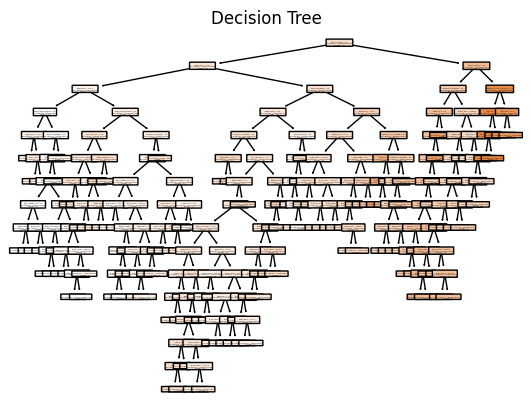

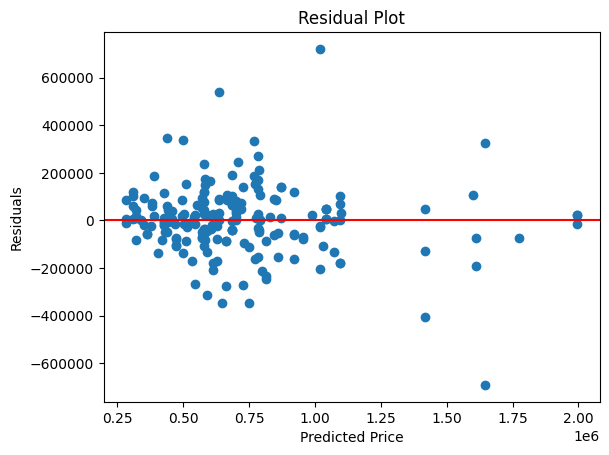

In [5]:
# optimal min_samples_leaf = 5
m = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
# fit model
m.fit(X_train, y_train)
# predict w model
y_pred = m.predict(X_test)
# calculate r2 on test set 
r2 = r2_score(y_test, y_pred)
# calculate rmse on the test set 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print r2 and rmse 
print("R^2:" , r2)
print("RMSE: " , rmse)

# plot the dendrogram 
plot_tree(m, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

# plot the residuals 
res = y_test - y_pred
plt.scatter(x=y_pred, y=res)
plt.axhline(0, color='red') # line at 0 for comparison
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

The linear regression model performs better on the test set. The linear regression model has a higher $R^2$ value, which indicates the data is more correlated, and a lower RMSE valye, which means that the error between the real target variable data and the predicted target variable data is lower. 

In [6]:
# linear regression using same previous X and y
# fit the model
lr_m = LinearRegression().fit(X_train, y_train)
# making predictions 
y_lr_pred = lr_m.predict(X_test)
# computing r^2 on test set 
r2_lr = r2_score(y_test, y_lr_pred)
# computing rmse on test set 
rmse_lr = np.sqrt(mean_squared_error(y_test, y_lr_pred))

# print r2 and rmse
print("R^2: " , r2_lr)
print("RMSE: " , rmse_lr)

R^2:  0.8202733305970942
RMSE:  143575.1966066198


5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

I see a straight line with a slope very close to 1. There appears to be an almost perfect linear relationship between the two models.

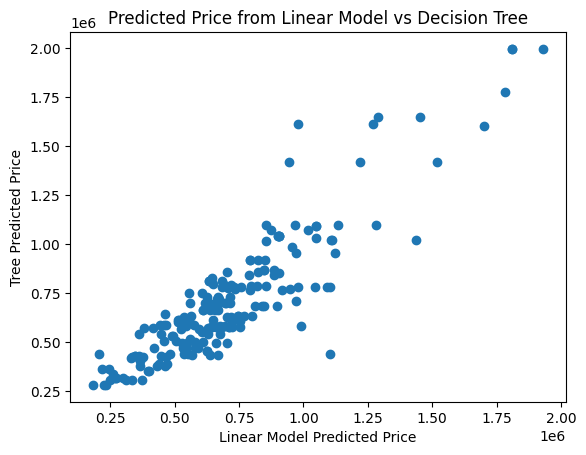

In [7]:
# x = linear model and y = tree 
plt.scatter(x=y_lr_pred, y=y_pred)
plt.xlabel("Linear Model Predicted Price")
plt.ylabel("Tree Predicted Price")
plt.title("Predicted Price from Linear Model vs Decision Tree")
plt.show()

## **Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

There are 2029 observations and 31 variables. 

In [8]:
df = pd.read_csv("./hw data/corporate_ratings.csv")
print(df.shape)
df.head()

(2029, 31)


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.



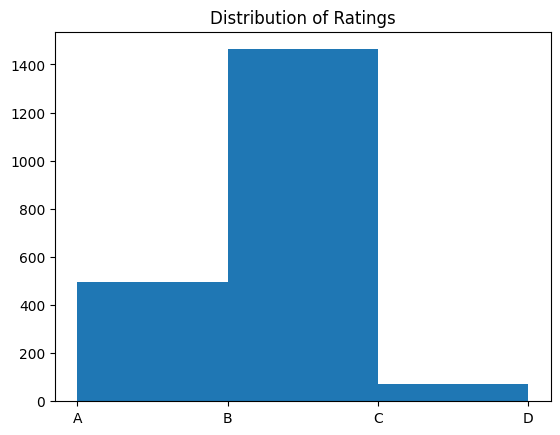

In [9]:
# combine AAA/AA/A
df['Rating'] = df['Rating'].replace("AAA", "A")
df['Rating'] = df['Rating'].replace("AA", "A")
# combine BBB/BB/B
df['Rating'] = df['Rating'].replace("BBB", "B")
df['Rating'] = df['Rating'].replace("BB", "B")
# combine CCC/CC/C
df['Rating'] = df['Rating'].replace("CCC", "C")
df['Rating'] = df['Rating'].replace("CC", "C")

# print out all unique values to make sure everything replaced well 
df['Rating'].unique()

# plot histogram of Rating
plt.hist(x=df['Rating'], bins=3)
plt.title("Distribution of Ratings")
plt.show()

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 



In [10]:
# print out all variables
print(df.columns)
# make one-hot-encoded representation of Sector
sector_dummy = pd.get_dummies(df['Sector'], drop_first=False)
# concat sector dummies with original dataframes
# drop variable list
col = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
X = pd.concat([df.drop(columns='Sector'), sector_dummy], axis=1)
X = X.drop(columns=col) 

# check that everything dropped properly
X.columns

Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'],
      dtype='object')


Index(['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover', 'Basic Industries',
       'Capital Goods', 'Consumer Durables', 'Consumer Non-Durables',
       'Consumer Services', 'Energy', 'Finance', 'Health Care',
       'Miscellaneous', 'Public Utilities', 'Technology', 'Transportation'],
      dtype='object')

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

The model predicts the different bond ratings with 73.4% accuracy. 

In [11]:
# train test split w/ X from previous code block 
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# find best value for min_samples_leaf :: 
# create dictionary for leaf size and r2
acc_dict = {} 
# iterate over possible values 
for leaf_size in range(1, 26):
    # create classifier
    c = DecisionTreeClassifier(min_samples_leaf=leaf_size, random_state=42)
    # fit classifier
    c.fit(X_train, y_train)
    # predict 
    y_pred = c.predict(X_test)
    # calculate accuracy 
    acc = accuracy_score(y_test, y_pred)
    # save leaf size and acc 
    acc_dict[leaf_size] = acc

# find best leaf size = max acc
leaf = max(acc_dict, key=acc_dict.get)

# train classifier
clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
clf.fit(X_train, y_train)
# predict
y_pred = clf.predict(X_test)
# calculate confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# calculate accuracy
accur = accuracy_score(y_test, y_pred)

print("Confusion Matrix: \n" , cm)
print("\nAccuracy: " , accur)

Confusion Matrix: 
 [[ 46  50   0   0]
 [ 42 252   0   0]
 [  0  15   0   0]
 [  0   1   0   0]]

Accuracy:  0.7339901477832512


5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

Yes, the results do change. The accuracy has now increased to 77% from 73%. I interpret this as Rating Agency Name does have a positive impact on the model predicting Rating correctly. 

In [12]:
# train test split
# one-hot-encode rating agency name
rdummy = pd.get_dummies(df['Rating Agency Name'], drop_first=False)
# concat with previous X
X = pd.concat([X, rdummy], axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# find best value for min_samples_leaf :: 
# create dictionary for leaf size and r2
acc_dict = {} 
# iterate over possible values 
for leaf_size in range(1, 26):
    # create classifier
    c = DecisionTreeClassifier(min_samples_leaf=leaf_size, random_state=42)
    # fit classifier
    c.fit(X_train, y_train)
    # predict 
    y_pred = c.predict(X_test)
    # calculate accuracy 
    acc = accuracy_score(y_test, y_pred)
    # save leaf size and acc 
    acc_dict[leaf_size] = acc

# find best leaf size = max acc
leaf = max(acc_dict, key=acc_dict.get)

# train classifier
clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
clf.fit(X_train, y_train)
# predict
y_pred = clf.predict(X_test)
# calculate confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# calculate accuracy
accur = accuracy_score(y_test, y_pred)

print("Confusion Matrix: \n" , cm)
print("\nAccuracy: " , accur)

Confusion Matrix: 
 [[ 59  37   0   0]
 [ 33 254   7   0]
 [  0  15   0   0]
 [  0   1   0   0]]

Accuracy:  0.770935960591133
